In [40]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import Series, DataFrame

In [2]:
url = 'https://www.dropbox.com/s/l29oppon2veaq4n/Election_Donor_Data.csv?dl=0#'


In [31]:
donor_df = pd.read_csv('Election_Donor_Data.csv',low_memory=False)

In [32]:
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 68.8+ MB


In [9]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [10]:
donor_df['contb_receipt_amt'].value_counts().head()

100.0    178188
50.0     137584
25.0     110345
250.0     91182
500.0     57984
Name: contb_receipt_amt, dtype: int64

In [11]:
don_mean = donor_df['contb_receipt_amt'].mean()
don_std = donor_df['contb_receipt_amt'].std()
print('The average donation was %.2f with a std %.2f' %(don_mean,don_std))
print('\n')
i =i+1

The average donation was 298.24 with a std 3749.67




NameError: name 'i' is not defined

In [12]:
don_mean = donor_df['contb_receipt_amt'].mean()

In [8]:
print(don_mean)

298.2351500951093


In [13]:
don_std = donor_df['contb_receipt_amt'].std()
print(don_std)

3749.666723269043


In [14]:
top_donor = donor_df['contb_receipt_amt'].copy()

top_donor.sort_values()

top_donor.head()

0    250.0
1     50.0
2    250.0
3    250.0
4    300.0
Name: contb_receipt_amt, dtype: float64

In [15]:
top_donor = top_donor[top_donor > 0]

top_donor.sort_values(ascending = True).head()

335573    0.01
335407    0.01
335352    0.01
324596    0.01
329896    0.01
Name: contb_receipt_amt, dtype: float64

In [18]:
top_donor.value_counts().head(10)

100.0     178188
50.0      137584
25.0      110345
250.0      91182
500.0      57984
2500.0     49005
35.0       37237
1000.0     36494
10.0       33986
200.0      27813
Name: contb_receipt_amt, dtype: int64

In [16]:
com_don = top_donor[top_donor < 2500]

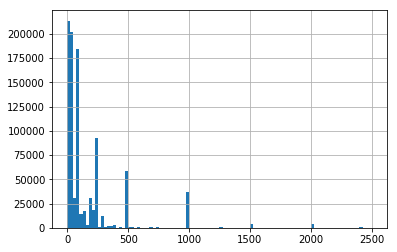

In [41]:
com_don.hist(bins=100)

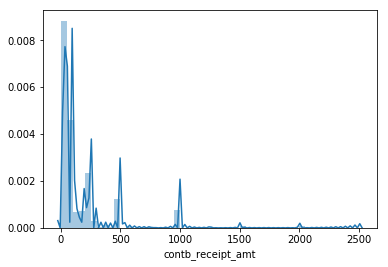

In [42]:
sns.distplot(com_don, hist=True)

In [18]:
# Donation by party, for that we are going to make another data frame

candidates = donor_df.cand_nm.unique()

candidates

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick', 'Cain, Herman',
       'Gingrich, Newt', 'McCotter, Thaddeus G', 'Huntsman, Jon',
       'Perry, Rick'], dtype=object)

In [19]:
# Now map the party with candidate

party_map = {'Bachmann, Michelle':'Republican', 
            'Cain, Herman': 'Republican',
             'Gingrich, Newt': 'Republican',
            'Huntsman, Jon' : 'Republican',
            'Johnson, Gary Earl' : 'Republican',
            'McCotter, Thaddeus G' : 'Republican',
            'Obama, Barack' : 'Democrat',
            'Paul, Ron' : 'Republican',
            'Pawlenty, Timothy' : 'Republican',
            'Perry Rick' : 'Republican',
            "Roemer, Charles E.'Buddy' III" : 'Republican',
            'Romney, Mitt' : 'Republican',
            'Santorum, Rick' : 'Republican'}

In [86]:
donor_df['Party'] = donor_df.cand_nm.map(party_map)
# donor_df['Party'] = donor_df.pd._libs.lib.map_infer(party_map)

In [87]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [22]:
# Method 2

for i in xrange(0,len(donor_df)):
if donor_df['cand_nm'][i] == 'Obama,Barack':
donor_df['Party'][i] = 'Democrat'
else:
donor_df['Party'][i] = 'Republican'

IndentationError: expected an indented block (<ipython-input-22-09f7447b48e7>, line 4)

In [24]:
donor_df = donor_df[donor_df.contb_receipt_amt>0]

In [54]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [26]:
donor_df.groupby('cand_nm')['contb_receipt_amt'].count()

cand_nm
Bachmann, Michelle                 13082
Cain, Herman                       20052
Gingrich, Newt                     46883
Huntsman, Jon                       4066
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Obama, Barack                     589127
Paul, Ron                         143161
Pawlenty, Timothy                   3844
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Romney, Mitt                      105155
Santorum, Rick                     46245
Name: contb_receipt_amt, dtype: int64

In [54]:
cand_amount = donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

In [27]:
cand_amount = donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

i = 0

for don in cand_amount:
    print('The candidate %s raise %.1f dollars' %(cand_amount.index[i],don))
    print('\n')
    i = i + 1

The candidate Bachmann, Michelle raise 2711439.3 dollars


The candidate Cain, Herman raise 7101081.9 dollars


The candidate Gingrich, Newt raise 12832769.7 dollars


The candidate Huntsman, Jon raise 3330373.5 dollars


The candidate Johnson, Gary Earl raise 566961.6 dollars


The candidate McCotter, Thaddeus G raise 39030.0 dollars


The candidate Obama, Barack raise 135877427.2 dollars


The candidate Paul, Ron raise 21009619.8 dollars


The candidate Pawlenty, Timothy raise 6004819.5 dollars


The candidate Perry, Rick raise 20305754.0 dollars


The candidate Roemer, Charles E. 'Buddy' III raise 373009.9 dollars


The candidate Romney, Mitt raise 88335907.5 dollars


The candidate Santorum, Rick raise 11043159.3 dollars




In [28]:
# AMit Code

cand_amount = donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

print(cand_amount)

i = 0
j = 1

for don in cand_amount:
    print('the candidate {} raise {:0.1f} dollors'.format(cand_amount.index[i],don))
    #print('The candidate %s raise %.0f dollars' %(cand_amount.index[i],don))
    print('\n')
    i = i + 1  
    j = j + 1
    

cand_nm
Bachmann, Michelle                2.711439e+06
Cain, Herman                      7.101082e+06
Gingrich, Newt                    1.283277e+07
Huntsman, Jon                     3.330373e+06
Johnson, Gary Earl                5.669616e+05
McCotter, Thaddeus G              3.903000e+04
Obama, Barack                     1.358774e+08
Paul, Ron                         2.100962e+07
Pawlenty, Timothy                 6.004819e+06
Perry, Rick                       2.030575e+07
Roemer, Charles E. 'Buddy' III    3.730099e+05
Romney, Mitt                      8.833591e+07
Santorum, Rick                    1.104316e+07
Name: contb_receipt_amt, dtype: float64
the candidate Bachmann, Michelle raise 2711439.3 dollors


the candidate Cain, Herman raise 7101081.9 dollors


the candidate Gingrich, Newt raise 12832769.7 dollors


the candidate Huntsman, Jon raise 3330373.5 dollors


the candidate Johnson, Gary Earl raise 566961.6 dollors


the candidate McCotter, Thaddeus G raise 39030.0 dollors


th

In [40]:
cand_amount = donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

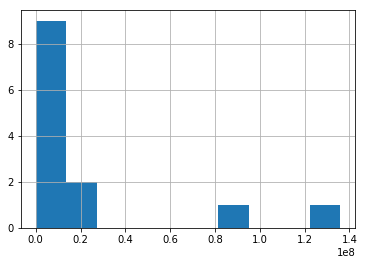

In [44]:
cand_amount.hist()

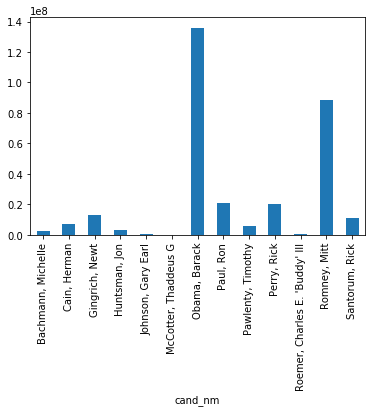

In [46]:
cand_amount.plot(kind='bar')

In [85]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


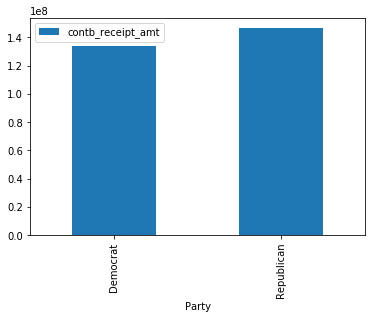

In [89]:
donor_df.groupby('Party')['contb_receipt_amt'].sum().plot(kind='bar',legend = True)

In [95]:
occupation_df = donor_df.pivot_table('contb_receipt_amt',
                                   index='contbr_occupation',
                                   columns = 'Party',
                                   aggfunc = 'sum')

In [96]:
occupation_df.head()

Party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN


In [99]:
occupation_df.shape

(43787, 2)

In [103]:
occupation_df = occupation_df[occupation_df.sum(1) > 1000000]

In [101]:
occupation_df.shape

(29, 2)

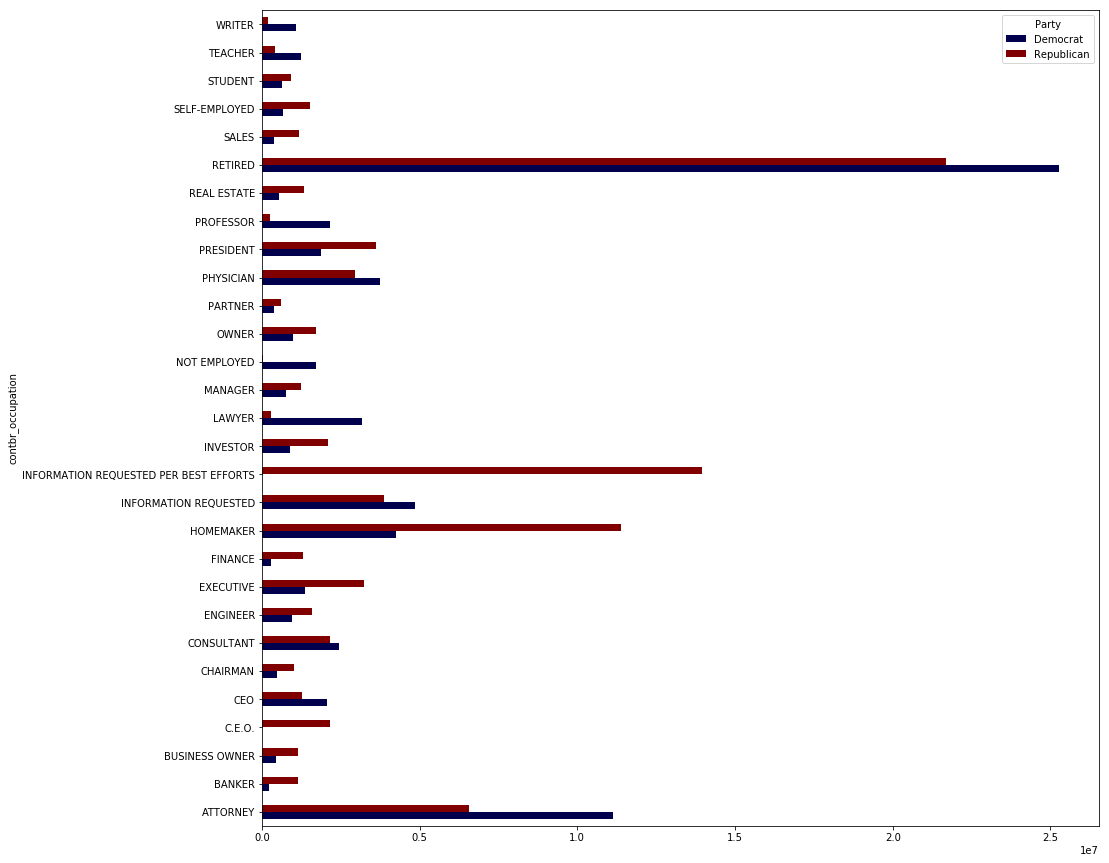

In [111]:
occupation_df.plot(kind='barh', figsize=(15,15),cmap='seismic')

In [112]:
occupation_df.drop(['INFORMATION REQUESTED PER BEST EFFORTS','INFORMATION REQUESTED'],axis=0,inplace=True)

In [114]:
occupation_df.loc['CEO'] = occupation_df.loc['CEO'] + occupation_df.loc['C.E.O.']

occupation_df.drop('C.E.O.',inplace=True)

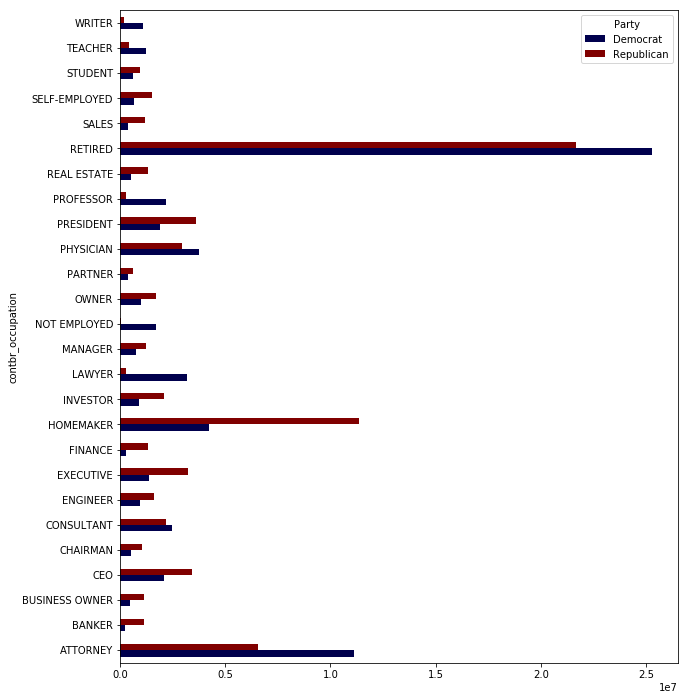

In [116]:
occupation_df.plot(kind='barh',figsize=(10,12),cmap = 'seismic')